In [1]:
import sys
import sys, os
sys.path.append(os.path.abspath('..'))

from src.data_base import get_engine, q

engine = get_engine(
    user='SA',
    password='Miko321123',
    server='localhost:1433',
    database='AdventureWorks2025'
)

c:\Users\Admin\Desktop\examsql\.venv\Lib\site-packages\pandas\io\sql.py:1648: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  con = self.exit_stack.enter_context(con.connect())


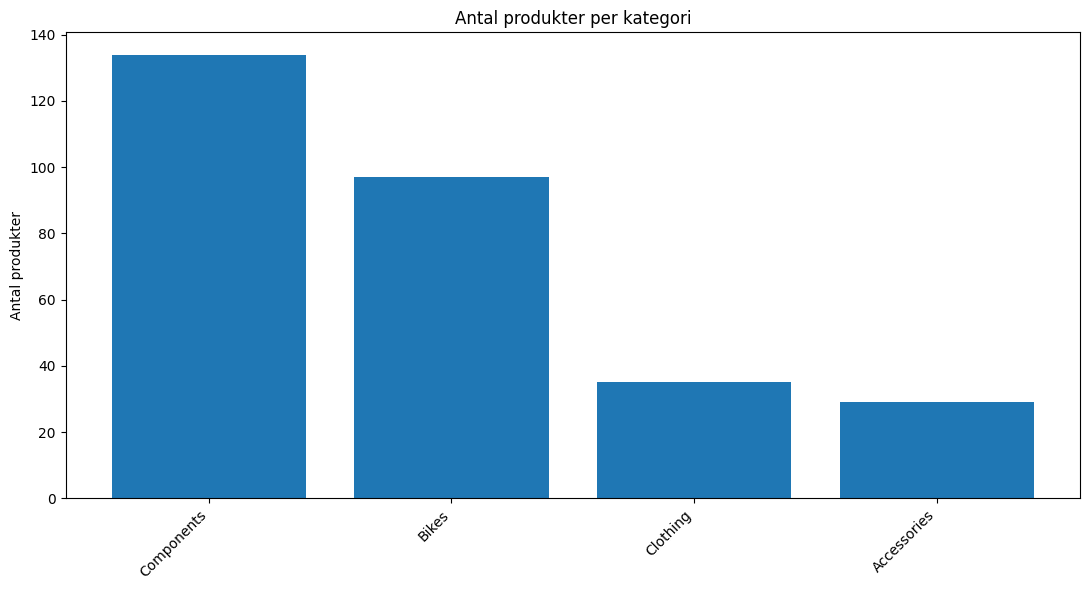

Flest produkter: Components (134)
Minst produkter: Accessories (29)


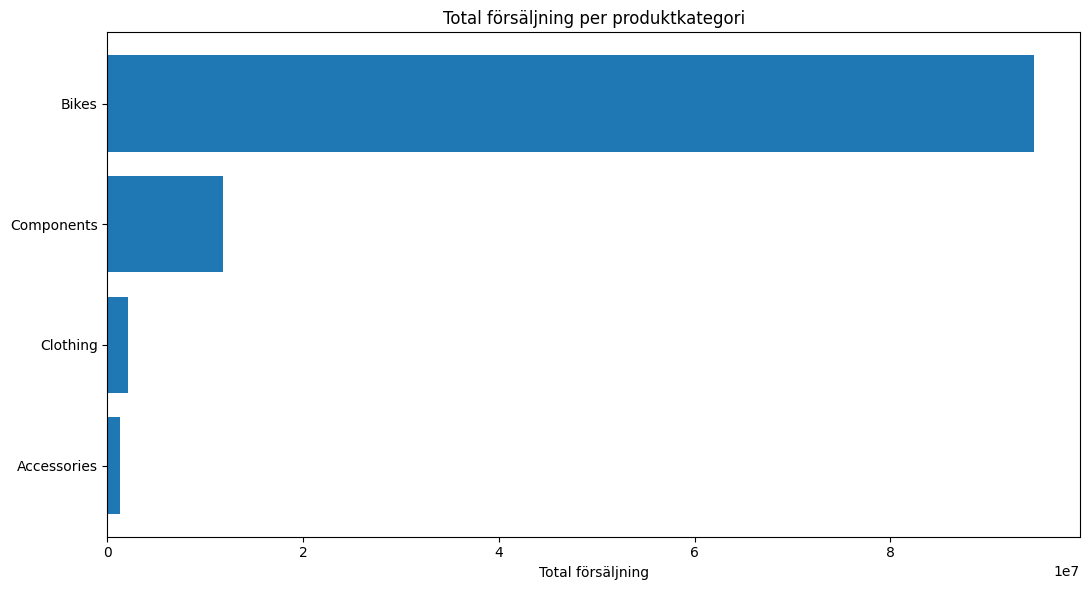

Störst försäljning: Bikes (94651172.704731)
Minst försäljning: Accessories (1272072.883926)


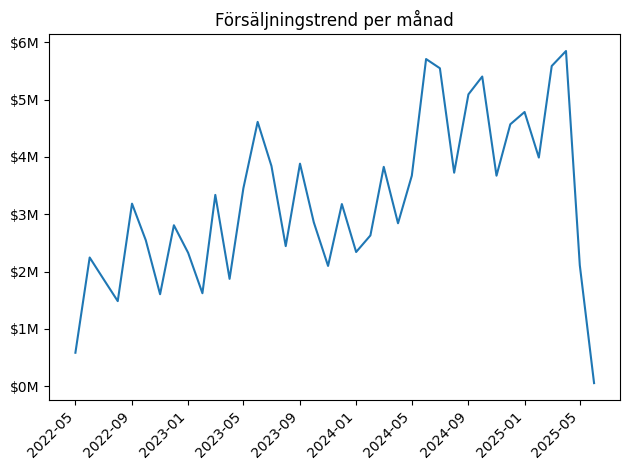

Högsta månad: 2025-04-01 (5847164.693)
Lägsta månad: 2025-06-01 (52478.1872)


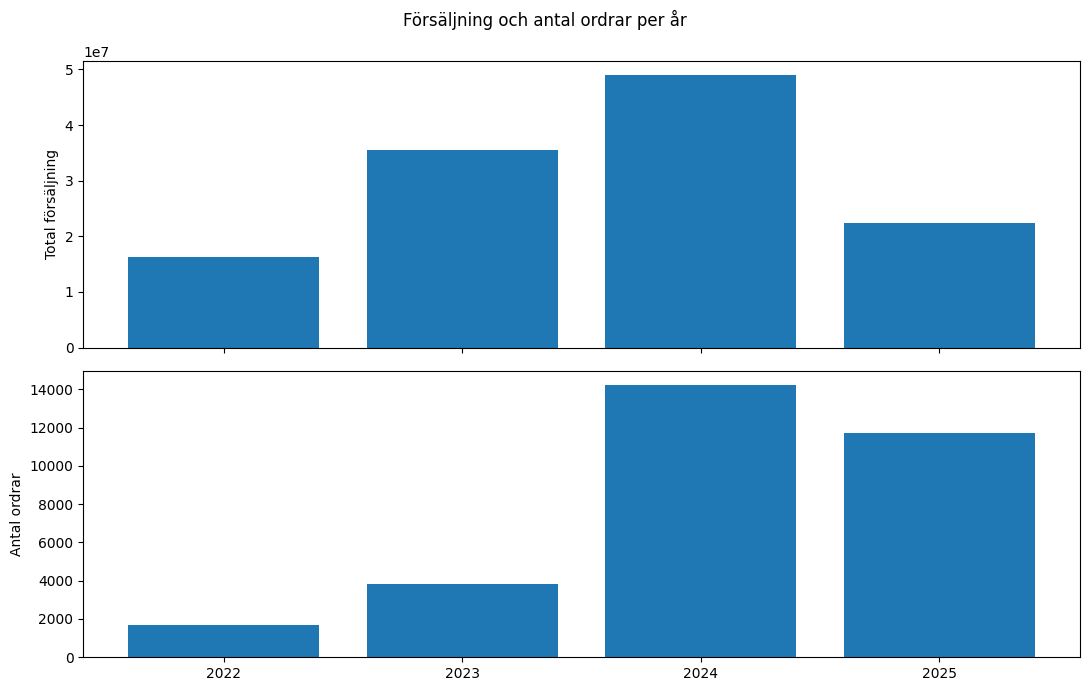

Högst försäljning: 2024 (49020486.512)
Lägst försäljning: 2022 (16316694.169)
Flest ordrar: 2024 (14244)
Minst ordrar: 2022 (1692)


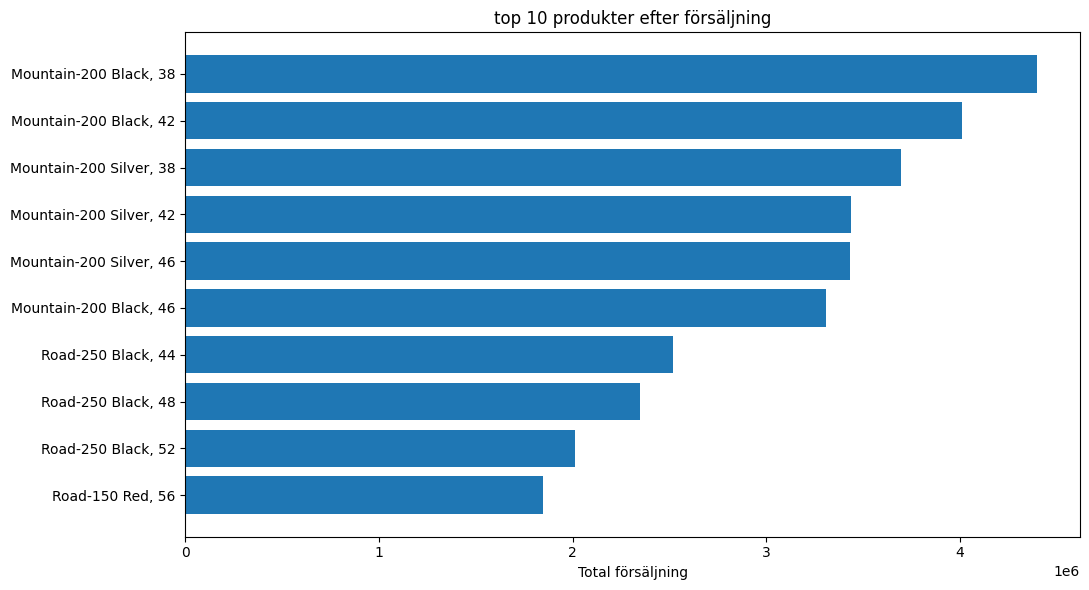

#1 produkt: Mountain-200 Black, 38 (4400592.8004)
Kategori fördelning i top 10:
Category
Bikes    10
Name: count, dtype: int64
Dominerande kategori Bikes


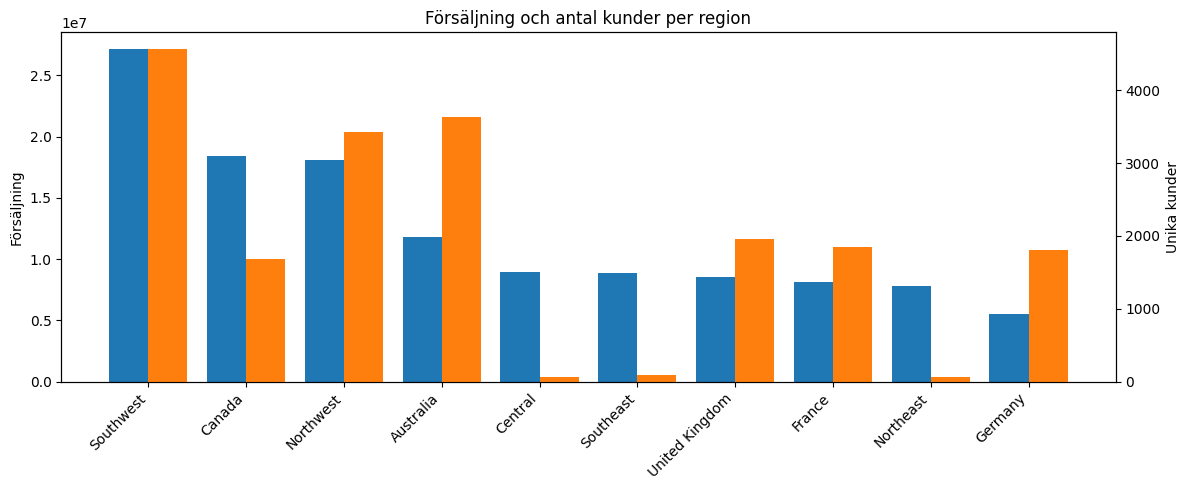

Starkast region: Southwest (27150594.5893)
Svagast region: Germany (5479819.5755)
Southwest sales/kund: 5947.556317480832
Flest kunder: Southwest (4565)
Har starkaste regionen flest kunder?: JA
Southwest sales/kund: 5947.556317480832


c:\Users\Admin\Desktop\examsql\src\part_seven.py:30: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['TotalSales'].sum() / x['OrderCount'].sum())


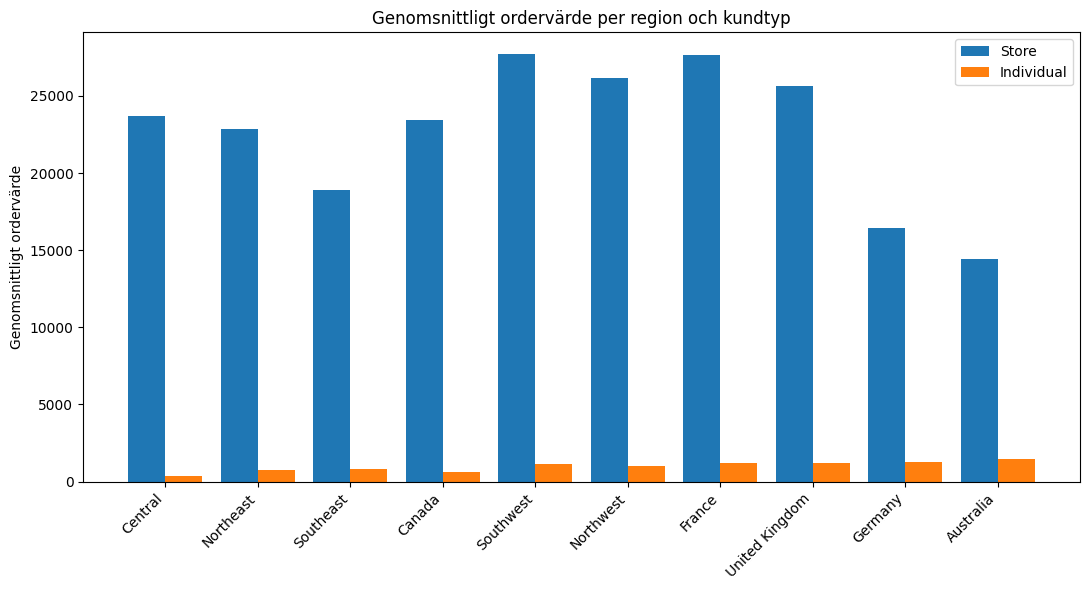

Totalt genomsnitt Store: 23850.61665609564
Totalt genomsnitt Individual: 1172.9035439748363
Högst totalt: Store
Högst region+kundtyp: Southwest / Store (27739.064964980025)


,Region,CustomerType,AvgOrderValue,TotalSales,OrderCount
0,Southeast,Individual,795.525247,1.352393e+04,17
1,Northeast,Individual,721.837770,7.218378e+03,10
2,Southwest,Store,27739.064965,2.083204e+07,751
3,Germany,Individual,1287.526249,3.198215e+06,2484
4,Northwest,Store,26172.682315,1.402856e+07,536
5,France,Individual,1176.183431,2.921640e+06,2484
6,United Kingdom,Store,25671.311887,4.826207e+06,188
7,United Kingdom,Individual,1236.503488,3.747842e+06,3031
8,Southwest,Individual,1154.496035,6.318557e+06,5473
9,France,Store,27649.519705,5.198110e+06,188


In [2]:
from src import part_one, part_two, part_three, part_four, part_five, part_six, part_seven

# Varje del tar en run_q funktion som kör SQL -> DataFrame
run_q = lambda sql: q(engine, sql)

part_one.run(run_q)
part_two.run(run_q)
part_three.run(run_q)
part_four.run(run_q)
part_five.run(run_q)
part_six.run(run_q)
part_seven.run(run_q)

## AdventureWorks Försäljningsanalys

I denna analys använder jag AdventureWorks2025-databasen för att undersöka företagets försäljning.  
Jag hämtar data från SQL Server med Python, bearbetar den i pandas och skapar visualiseringar som svarar på affärsfrågor.

Syftet är att få en tydlig bild av:
- hur många produkter som finns per kategori
- vilka kategorier/produkter som säljer mest
- hur försäljningen förändras över tid
- skillnader mellan år, regioner och kundtyper (Store vs Individual)



Steg 1 - Antal produkter per kategori

- Markdown (före)
- Titel: Antal produkter per kategori
- Affärsfråga: Hur många produkter finns i varje produktkategori?
- Metod: Jag kopplar ihop ProductCategory -> ProductSubcategory -> Product och räknar unika produkter per kategori i SQL. Resultatet visas som ett vertikalt stapeldiagram.

- Markdown (efter)
- Vad visar visualiseringen? Antalet unika produkter i varje kategori.
- Vad kan vi lära oss? Man ser tydligt vilka kategorier som har störst respektive minst sortiment. Detta kan användas för att förstå produktbredd och var sortimentet är smalast/bredast.


Steg 2 – Försäljning per produktkategori

- Markdown (före)
- Titel: Total försäljning per produktkategori
- Affärsfråga: Vilka produktkategorier genererar mest intäkter?
- Metod: Jag joinar SalesOrderDetail med Product -> Subcategory -> Category och summerar försäljning per kategori i SQL. Jag sorterar från högst till lägst och visualiserar som horisontellt stapeldiagram.

- Markdown (efter)
- Vad visar visualiseringen? Total försäljning per kategori, sorterat så att största ligger överst.
- Vad kan vi lära oss? Vi kan identifiera vilken kategori som är störst och minst samt jämföra skillnaderna i intäkter mellan kategorierna. Detta hjälper att prioritera vilka kategorier som driver mest affärsvärde.
- Insikt: Störst försäljning: Bikes (94651172.704731), Minst försäljning: Accessories (1272072.883926). Det betyder att bikes står för den klart största delen av intäkterna, medan Accessories bidrar minst. Fokus på bikes ger störst effekt om man vill påverka total försäljning.


Steg 3 – Försäljningstrend över tid

- Markdown (före)
- Titel: Försäljningstrend per månad
- Affärsfråga: Hur har försäljningen utvecklats över tid?
- Metod: Jag aggregerar total försäljning per månad i SalesOrderHeader i SQL och sorterar kronologiskt. Sedan plottar jag en linjegraf för att se utvecklingen över tid.

- Markdown (efter)
- Vad visar visualiseringen? En tidslinje med försäljning per månad (minst 12 månader).
- Vad kan vi lära oss? Vi kan se om försäljningen ökar, minskar eller varierar säsongsvis. Jag lyfter även fram vilken månad som har högst och lägst försäljning för att tydliggöra toppar och dalar.


Steg 4 – Försäljning och antal ordrar per år

- Markdown (före)
- Titel: Försäljning och antal ordrar per år
- Affärsfråga: Hur ser total försäljning och antal ordrar ut per år?
- Metod: Jag grupperar SalesOrderHeader per år och beräknar både total försäljning och antal ordrar i SQL. Jag visualiserar detta med två stapeldiagram (ett för försäljning och ett för ordrar) för att jämföra utvecklingen.

- Markdown (efter)
- Vad visar visualiseringen? Försäljning per år och antal ordrar per år i kronologisk ordning.
- Vad kan vi lära oss? Jag jämför åren för att se vilket år som har högst/lägst försäljning och flest/minst ordrar. Det visar om försäljning och ordervolym följer samma trend eller om bara det ena ökar.


Steg 5 – Top 10 produkter

- Markdown (före)
- Titel: Top 10 produkter efter försäljning
- Affärsfråga: Vilka 10 produkter genererar mest försäljning?
- Metod: Jag joinar SalesOrderDetail med Product och summerar försäljning per produkt. Jag väljer TOP 10, sorterar från högst till lägst och visualiserar med ett horisontellt stapeldiagram.

- Markdown (efter)
- Vad visar visualiseringen? De 10 produkter som ger högst total försäljning, med högsta överst.
- Vad kan vi lära oss? Jag identifierar #1-produkten och anger exakt försäljningsvärde. Jag analyserar även vilken kategori som dominerar topplistan, vilket kan säga något om vilka produktområden som driver mest intäkter.
- Insikt: #1 produkt: Mountain-200 Black, 38 (4400592.8004) i total försäljning, Kategori som dominerar topp 10: Bikes (10 av 10 produkter i listan). Det tyder på att de mest intäktsdrivande produkterna kommer från bikes, vilket stärker bilden från steg 2 att bikes är viktigaste kategorin.


Steg 6 – Försäljning och antal kunder per region

- Markdown (före)
- Titel: Försäljning och antal kunder per region
- Affärsfråga: Hur skiljer sig försäljningen mellan regioner, och hur många unika kunder har varje region?
- Metod: Jag joinar SalesOrderHeader med SalesTerritory och Customer, aggregerar total försäljning och räknar unika kunder per region i SQL. Jag sorterar regioner efter försäljning och visar två staplar per region i ett grupperat diagram.

- Markdown (efter)
- Vad visar visualiseringen? Total försäljning och antal unika kunder per region, sorterat från högst försäljning.
- Vad kan vi lära oss? Jag pekar ut starkaste och svagaste region samt jämför om hög försäljning beror på många kunder eller högre ordervärde per kund (t.ex. försäljning/kund). Detta ger en indikation om regionens intäkter drivs av volym eller värde.


Steg 7 – Genomsnittligt ordervärde per region och kundtyp

- Markdown (före)
- Titel: Genomsnittligt ordervärde per region och kundtyp
- Affärsfråga: Vilka regioner har högst/lägst genomsnittligt ordervärde och skiljer det sig mellan Store (företag) och Individual (privat)?
- Metod: Jag beräknar genomsnittligt ordervärde som total försäljning/antal ordrar per region och kundtyp (Store vs Individual) med hjälp av SalesOrderHeader, Customer, Store och SalesTerritory. Resultatet visas som ett grupperat stapeldiagram och sorteras efter högst genomsnitt totalt per region.

- Markdown (efter)
- Vad visar visualiseringen? Två staplar per region: genomsnittligt ordervärde för Store och för Individual.
- Vad kan vi lära oss? Jag jämför om Store eller Individual har högre ordervärde totalt och om det varierar mellan regioner. Jag lyfter även fram vilken region + kundtyp-kombination som har högst ordervärde och ger en kort tolkning av möjliga orsaker.



## Sammanfattning 

Huvudsakliga fynd

- Kategorierna skiljer sig tydligt i produktbredd och i hur mycket intäkter de genererar.

- Försäljningen varierar över tid och har tydliga topp- och bottenmånader.

- Årsjämförelsen visar hur försäljning och ordervolym utvecklas och om de följer samma trend.

- Top 10 visar vilka produkter som driver mest intäkter och vilken kategori som dominerar.

- Regionanalysen visar om starka regioner drivs av många kunder eller högre värde per kund.

- Kundtypanalysen visar skillnader mellan företagskunder (Store) och privatkunder (Individual) i ordervärde.

Rekommendationer

- Prioritera marknadsföring/lager på de kategorier och produkter som driver mest försäljning.

- Undersök säsongstoppar och planera kampanjer/kapacitet inför starka månader.

- För regioner med hög försäljning men få kunder: fokusera på kundtillväxt.

- För regioner med många kunder men lägre värde: arbeta med uppsäljning/produktmix.

- Anpassa strategi för Store vs Individual där ordervärden skiljer sig mycket.